In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from models.plot_figure import plot_figure

sys.path.insert(1, 'models')
from q_voter_theoretical import *

In [33]:
Image_width = 10
plt.rc('text', usetex = True) # latex ticks
plt.rc('text.latex')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['Computer Modern'],
})

EXTRA_SMALL = 10
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=MEDIUM_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Figure 2

In [34]:
x_ax_limits = [0, 0.12]

k_L = 50
k_R = 150
q_a = 4
q_c = 10
P = np.linspace(0, 0.07, 500)
t = np.linspace(0, 1000,  1000)
IC = [0.999, 1 - 0.999]
SFP_L = PA_stable_fixed_points(P, t, k_L, q_a, q_c, IC)

upper_spinodal_L = SFP_L[0:-1][np.abs(np.diff(SFP_L)) == np.max(np.abs(np.diff(SFP_L)))][0]

C_L = np.linspace(0.5001, upper_spinodal_L, 10000)
IC_UFP = [0.055, 0.45]
UFP_L = PA_unstable_fixed_points(C_L, k_L, q_a, q_c, IC_UFP, interpolate = True)

MFA_results = MFA_equation(np.linspace(0.5001, 1, 10000), q_a, q_c)

SFP_R = PA_stable_fixed_points(P, t, k_R, q_a, q_c, IC)
upper_spinodal_R = SFP_R[0:-1][np.abs(np.diff(SFP_R)) == np.max(np.abs(np.diff(SFP_R)))][0]
C_R = np.linspace(0.5001, upper_spinodal_R, 10000)
UFP_R = PA_unstable_fixed_points(C_R, k_R, q_a, q_c, IC_UFP, interpolate = True)

c:\Users\lab\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)


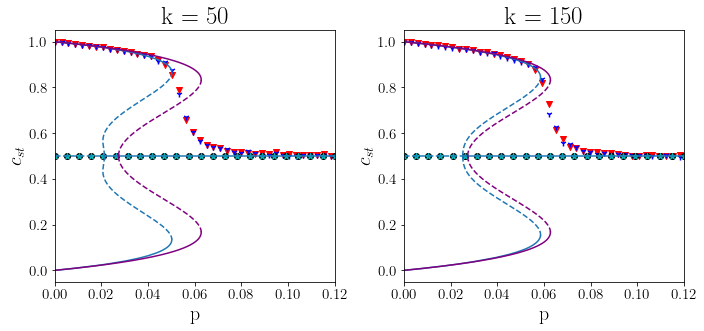

In [35]:
fig, axs = plt.subplots(ncols = 2, figsize = (Image_width, 0.5 * Image_width))

ax = axs[0]
# PA
# upper part
ax.plot(UFP_L, C_L, '--')
ax.plot(P[SFP_L >= upper_spinodal_L], SFP_L[SFP_L >= upper_spinodal_L], color = ax.get_lines()[-1].get_c())
ax.hlines(y = 0.5, xmin = x_ax_limits[0], xmax = UFP_L[0], linestyles = '--')
ax.hlines(y = 0.5, xmin = UFP_L[0], xmax = x_ax_limits[1])
# lower part
ax.plot(UFP_L, 1 - C_L, '--', color = ax.get_lines()[-1].get_c())
ax.plot(P[SFP_L >= upper_spinodal_L], 1 - SFP_L[SFP_L >= upper_spinodal_L], color = ax.get_lines()[-1].get_c())
# MFA
# upper part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
# lower part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], 1 - np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], 1 - np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
ax.set_xlim(x_ax_limits)

plot_figure(4, 10, 50, 1, ax)
plot_figure(4, 10, 50, 1, ax, "ws")

xs = np.linspace(0, 0.12, 24)
vals = 0.5 * np.ones([1, 24])

ax.scatter(xs, vals, marker="o", color="k")
ax.scatter(xs, vals, marker='*', color="c")
ax.set_xlabel('p')
ax.set_ylabel('$c_{st}$')
ax.set_title('k = 50')

ax = axs[1]
# PA
# upper part
ax.plot(UFP_R, C_R, '--')
ax.plot(P[SFP_R >= upper_spinodal_R], SFP_R[SFP_R >= upper_spinodal_R], color = ax.get_lines()[-1].get_c())
ax.hlines(y = 0.5, xmin = x_ax_limits[0], xmax = UFP_R[0], linestyles = '--')
ax.hlines(y = 0.5, xmin = UFP_R[0], xmax = x_ax_limits[1])
# lower part
ax.plot(UFP_R, 1 - C_R, '--', color = ax.get_lines()[-1].get_c())
ax.plot(P[SFP_R >= upper_spinodal_R], 1 - SFP_R[SFP_R >= upper_spinodal_R], color = ax.get_lines()[-1].get_c())
# MFA
# upper part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
# lower part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], 1 - np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], 1 - np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')

ax = axs[1]

plot_figure(4, 10, 150, 1, ax)
plot_figure(4, 10, 150, 1, ax, "ws")


xs = np.linspace(0, 0.12, 24)
vals = 0.5 * np.ones([1, 24])

ax.scatter(xs, vals, marker="o", color="k")
ax.scatter(xs, vals, marker='*', color="c")

ax.set_xlim(x_ax_limits)
ax.set_xlabel('p')
ax.set_ylabel('$c_{st}$')
ax.set_title('k = 150')

plt.tight_layout()
plt.savefig('Figures/Fig_2.jpg', bbox_inches = 'tight', dpi = 500)

# Figure 3

In [36]:
x_ax_limits = [0.34, 0.5]

k_L = 50
k_R = 150
q_a = 10
q_c = 10
IC_UFP = [0.38, 0.45]
C = np.linspace(0.5001, 0.7, 10000)

SUFP_L = PA_unstable_fixed_points(C, k_L, q_a, q_c, IC_UFP, interpolate = True)
upper_spinodal_L = np.nanmax(SUFP_L)

SUFP_R = PA_unstable_fixed_points(C, k_R, q_a, q_c, IC_UFP, interpolate = True)
upper_spinodal_R = np.nanmax(SUFP_R)

MFA_results = MFA_equation(np.linspace(0.5001, 1, 10000), q_a, q_c)

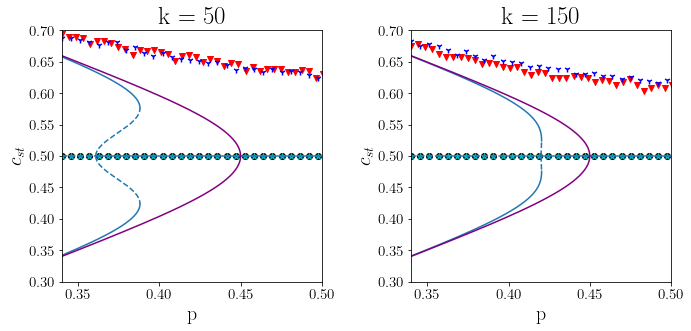

In [37]:
fig, axs = plt.subplots(ncols = 2, figsize = (Image_width, 0.5 * Image_width))

ax = axs[0]
# PA
# upper part
ax.plot(SUFP_L[:np.nanargmax(SUFP_L)], C[:np.nanargmax(SUFP_L)], '--')
ax.plot(SUFP_L[np.nanargmax(SUFP_L):], C[np.nanargmax(SUFP_L):], color = ax.get_lines()[-1].get_c())
ax.hlines(y = 0.5, xmin = x_ax_limits[0], xmax = SUFP_L[0], linestyles = '--')
ax.hlines(y = 0.5, xmin = SUFP_L[0], xmax = x_ax_limits[1])
# lower part
ax.plot(SUFP_L[:np.nanargmax(SUFP_L)], 1 - C[:np.nanargmax(SUFP_L)], '--', color = ax.get_lines()[-1].get_c())
ax.plot(SUFP_L[np.nanargmax(SUFP_L):], 1- C[np.nanargmax(SUFP_L):], color = ax.get_lines()[-1].get_c())
# MFA
# upper part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
# lower part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], 1 - np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], 1 - np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')

plot_figure(10, 10, 50, 1, ax)
plot_figure(10, 10, 50, 1, ax, "ws")

xs = np.linspace(0.34, 0.74, 72)
vals = 0.5 * np.ones([1, 72])

ax.scatter(xs, vals, marker="o", color="k")
ax.scatter(xs, vals, marker='*', color="c")

ax.set_xlim(x_ax_limits)
ax.set_ylim([0.3, 0.7])
ax.set_xlabel('p')
ax.set_ylabel('$c_{st}$')
ax.set_title('k = 50')


ax = axs[1]
# PA
# upper part
ax.plot(SUFP_R[:np.nanargmax(SUFP_R)], C[:np.nanargmax(SUFP_R)], '--')
ax.plot(SUFP_R[np.nanargmax(SUFP_R):], C[np.nanargmax(SUFP_R):], color = ax.get_lines()[-1].get_c())
ax.hlines(y = 0.5, xmin = x_ax_limits[0], xmax = SUFP_R[0], linestyles = '--')
ax.hlines(y = 0.5, xmin = SUFP_R[0], xmax = x_ax_limits[1])
# lower part
ax.plot(SUFP_R[:np.nanargmax(SUFP_R)], 1 - C[:np.nanargmax(SUFP_R)], '--', color = ax.get_lines()[-1].get_c())
ax.plot(SUFP_R[np.nanargmax(SUFP_R):], 1- C[np.nanargmax(SUFP_R):], color = ax.get_lines()[-1].get_c())
# MFA
# upper part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
# lower part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], 1 - np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], 1 - np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')


plot_figure(10, 10, 150, 1, ax)
plot_figure(10, 10, 150, 1, ax, "ws")

xs = np.linspace(0.34, 0.74, 72)
vals = 0.5 * np.ones([1, 72])

ax.scatter(xs, vals, marker="o", color="k")
ax.scatter(xs, vals, marker='*', color="c")

ax.set_xlim(x_ax_limits)
ax.set_ylim([0.3, 0.7])
ax.set_xlabel('p')
ax.set_ylabel('$c_{st}$')
ax.set_title('k = 150')

plt.tight_layout()
plt.savefig('Figures/Fig_3.jpg', bbox_inches = 'tight', dpi = 500)

# Figure 5

In [38]:
x_ax_limits = [0.755, 0.85]

k_L = 50
k_R = 150
q_a = 13
q_c = 10
IC_UFP = [0.38, 0.45]
C = np.linspace(0.5001, 0.7, 10000)

SUFP_L = PA_unstable_fixed_points(C, k_L, q_a, q_c, IC_UFP)
upper_spinodal_L = np.nanmax(SUFP_L)

SUFP_R = PA_unstable_fixed_points(C, k_R, q_a, q_c, IC_UFP)
upper_spinodal_R = np.nanmax(SUFP_R)

MFA_results = MFA_equation(np.linspace(0.5001, 1, 10000), q_a, q_c)

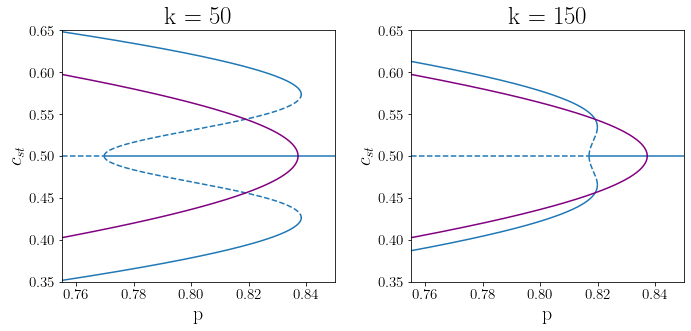

In [39]:
fig, axs = plt.subplots(ncols = 2, figsize = (Image_width, 0.5 * Image_width))

ax = axs[0]
# PA
# upper part
ax.plot(SUFP_L[:np.nanargmax(SUFP_L)], C[:np.nanargmax(SUFP_L)], '--')
ax.plot(SUFP_L[np.nanargmax(SUFP_L):], C[np.nanargmax(SUFP_L):], color = ax.get_lines()[-1].get_c())
ax.hlines(y = 0.5, xmin = x_ax_limits[0], xmax = SUFP_L[0], linestyles = '--')
ax.hlines(y = 0.5, xmin = SUFP_L[0], xmax = x_ax_limits[1])
# lower part
ax.plot(SUFP_L[:np.nanargmax(SUFP_L)], 1 - C[:np.nanargmax(SUFP_L)], '--', color = ax.get_lines()[-1].get_c())
ax.plot(SUFP_L[np.nanargmax(SUFP_L):], 1- C[np.nanargmax(SUFP_L):], color = ax.get_lines()[-1].get_c())
# MFA
# upper part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
# lower part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], 1 - np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], 1 - np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
ax.set_xlim(x_ax_limits)
ax.set_ylim([0.35, 0.65])
ax.set_xlabel('p')
ax.set_ylabel('$c_{st}$')
ax.set_title('k = 50')

ax = axs[1]
# PA
# upper part
ax.plot(SUFP_R[:np.nanargmax(SUFP_R)], C[:np.nanargmax(SUFP_R)], '--')
ax.plot(SUFP_R[np.nanargmax(SUFP_R):], C[np.nanargmax(SUFP_R):], color = ax.get_lines()[-1].get_c())
ax.hlines(y = 0.5, xmin = x_ax_limits[0], xmax = SUFP_R[0], linestyles = '--')
ax.hlines(y = 0.5, xmin = SUFP_R[0], xmax = x_ax_limits[1])
# lower part
ax.plot(SUFP_R[:np.nanargmax(SUFP_R)], 1 - C[:np.nanargmax(SUFP_R)], '--', color = ax.get_lines()[-1].get_c())
ax.plot(SUFP_R[np.nanargmax(SUFP_R):], 1- C[np.nanargmax(SUFP_R):], color = ax.get_lines()[-1].get_c())
# MFA
# upper part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
# lower part
ax.plot(MFA_results[:np.where(MFA_results == np.max(MFA_results))[0][0]], 1 - np.linspace(0.5, 1, 10000)[:np.where(MFA_results == np.max(MFA_results))[0][0]], color = 'purple', linestyle = '--')
ax.plot(MFA_results[np.where(MFA_results == np.max(MFA_results))[0][0]:], 1 - np.linspace(0.5, 1, 10000)[np.where(MFA_results == np.max(MFA_results))[0][0]:], color = 'purple')
ax.set_xlim(x_ax_limits)
ax.set_ylim([0.35, 0.65])
ax.set_xlabel('p')
ax.set_ylabel('$c_{st}$')
ax.set_title('k = 150')

plt.tight_layout()
plt.savefig('Figures/Fig_5.jpg', bbox_inches = 'tight', dpi = 500)

# Figure 6

In [40]:
q_c = 10
a = 4
b = 16
Q_a = np.array([4,  5,  6,  7,  8,  9, 10, 13, 16])
K = [50, 150, 450, 1350, 4050, 12150, 109350]

Differences_upper = np.ones([np.size(Q_a), np.size(K)])
Differences_lower = np.ones([np.size(Q_a), np.size(K)])

for i, q_a in enumerate(Q_a):
    MFA_results = MFA_equation(np.linspace(0.5001, 1, 100000), q_a, q_c)
    upper_spinodal_MFA = np.max(MFA_results)
    lower_spinodal_MFA = MFA_results[0]
    for j, k in enumerate(K):
        IC_UFP = [0.38, 0.45]
        if q_a < 6:
            up = 0.9
        else:
            up = 0.75
        C = np.linspace(0.5001, up, 10000)
        SUFP_L = PA_unstable_fixed_points(C, k, q_a, q_c, IC_UFP)
        if k == 1350 and q_a == 13:
            SUFP_L = SUFP_L[4:]
        elif (k == 12150 or k == 109350) and q_a == 13:
            SUFP_L[SUFP_L > SUFP_L[0]] = SUFP_L[0]
        elif k == 50 and q_a == 16:
            SUFP_L = SUFP_L[SUFP_L < 0.99]
        elif q_a == 5:
            SUFP_L = SUFP_L[SUFP_L < 0.99]
        upper_spinodal_PA = np.nanmax(SUFP_L)
        lower_spinodal_PA = SUFP_L[0]
        Differences_upper[i, j] = np.abs(upper_spinodal_PA - upper_spinodal_MFA)
        Differences_lower[i, j] = np.abs(lower_spinodal_PA - lower_spinodal_MFA)

c:\Users\lab\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 600.
  warnings.warn(msg, RuntimeWarning)
c:\Users\lab\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\lab\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


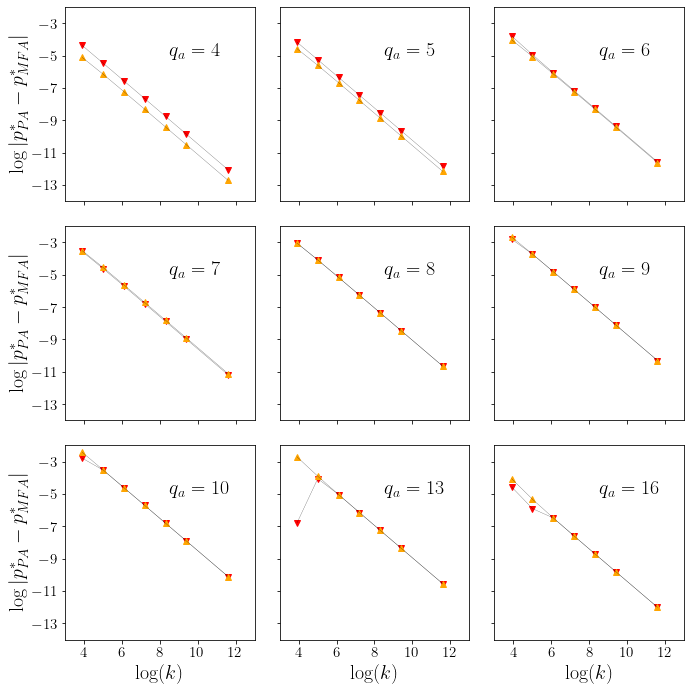

In [41]:
Differences_upper_plot = Differences_upper.reshape((3, 3, 7))
Differences_lower_plot = Differences_lower.reshape((3, 3, 7))
Q_a_plot = Q_a.reshape((3, 3))

fig, axs = plt.subplots(ncols = np.shape(Differences_upper_plot)[0], nrows = np.shape(Differences_upper_plot)[1],
                        sharex=True, sharey=True, figsize = (Image_width, Image_width))

for i in range(3):
    for j in range(3):
        ax = axs[i, j]
        ax.set_ylim([-14, -2])
        ax.set_xlim([3, 13])
        ax.plot(np.log(K), np.log(Differences_upper_plot[i, j, :]), 'v', color = 'red')
        ax.plot(np.log(K), np.log(Differences_upper_plot[i, j, :]), color = 'black', linewidth = 0.2)
        ax.plot(np.log(K), np.log(Differences_lower_plot[i, j, :]), '^', color = 'orange')
        ax.plot(np.log(K), np.log(Differences_lower_plot[i, j, :]), color = 'black', linewidth = 0.2)
        plt.xticks([4,6,8,10,12])
        plt.yticks([-13, -11, -9, -7, -5, -3])
        if j == 0:
            ax.set_ylabel('$\\log|p^\\ast_{PA} - p^\\ast_{MFA}|$')
        if i == 2:
            ax.set_xlabel('$\\log(k)$')
        ax.text(8.5, -5, f'$q_a = {Q_a_plot[i, j]}$')
plt.tight_layout()
plt.savefig('Figures/Fig_6.jpg', bbox_inches = 'tight', dpi = 500)
        